In [3]:
import numpy as np 
import pandas as pd
import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from ggplot import *

In [4]:
def apply_pca_tsne(x, labels, feature_name, n_components=50):
    
    feat_cols = [ 'pixel'+str(i) for i in range(x.shape[1]) ]
    df = pd.DataFrame(x,columns=feat_cols)
    df['label'] = labels
    df['label'] = df['label'].apply(lambda i: str(i))
    
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df[feat_cols].values)
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=800)
    tsne_pca_results = tsne.fit_transform(pca_result)
    df_tsne = df.loc[:,:].copy()
    df_tsne['x-tsne'] = tsne_pca_results[:,0]
    df_tsne['y-tsne'] = tsne_pca_results[:,1] 
    
    chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=15,alpha=0.9) \
        + ggtitle("PCA 50 followed by t-SNE: \n"+ feature_name)
    chart.save(feature_name+'.png')    
    
def plot_feature(feature_name, labels):
    print ('Plotting ', feature_name)
    x = np.load (feature_name+'.npy')
    x = np.array ([xi.flatten() for xi in x])
    x = np.reshape(x,(x.shape[0],x.shape[1]))
    
    apply_pca_tsne(x, labels, feature_name+'_pca_tsne_all', n_components=10)

('Plotting ', 'LandUse_enc_finetune_maxAgr_features')
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2100 samples in 0.001s...
[t-SNE] Computed neighbors for 2100 samples in 0.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2100
[t-SNE] Computed conditional probabilities for sample 2000 / 2100
[t-SNE] Computed conditional probabilities for sample 2100 / 2100
[t-SNE] Mean sigma: 12.001349
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.259884
[t-SNE] Error after 800 iterations: 0.520718
('Plotting ', 'LandUse_enc_finetune_sgd_8020All_features')
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2100 samples in 0.001s...
[t-SNE] Computed neighbors for 2100 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2100
[t-SNE] Computed conditional probabilities for sample 2000 / 2100
[t-SNE] Computed conditional probabilities for sample 2100 / 2100
[t-SNE] Mean sigma: 3.021972
[t-SNE] KL divergence aft

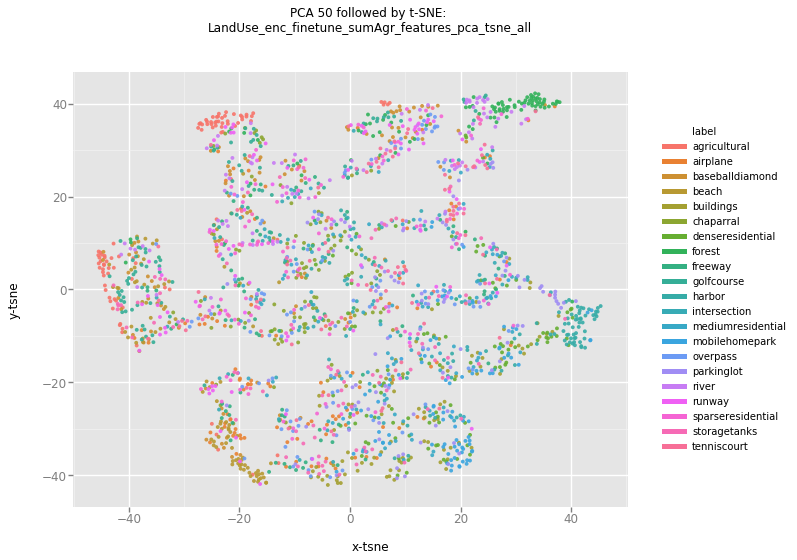

In [5]:
features = ['LandUse_enc_finetune_maxAgr_features',
           'LandUse_enc_finetune_sgd_8020All_features',
            'LandUse_enc_finetune_sumAgr_features']

labels = np.load ('LandUse_labels.npy')
labels = labels[1]
for feature_name in features:
    plot_feature (feature_name.split('.')[0], labels)
